In [ ]:
'''
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': pred})
output.to_csv('submission.csv', index=False)
competitions submit -c titanic -f submission.csv -m "Message"




1. Acquire training and testing data.
2. Wrangle, prepare, cleanse the data.
3. Analyze, identify patterns, and explore the data.
4. Model, predict and solve the problem.
5. Visualize, report, and present the problem solving steps and final solution.
6. Supply or submit the results.


sibSp -> # of siblings / spouses aboard the Titanic
parch -> # of parents / children aboard the Titanic
embarked -> Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


'''

In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:

train_data.describe(include='all')






,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
# column's names and dtypes
# print(train_data.info())

# show numerical values of features ( columns), count, mean std min
# my default shows only discrete features, 'all' for all, 'o' for objects, see .info() dtypes
# print(train_data.describe(include=object))

# print(train_data.select_dtypes(include='number').columns.tolist())
numerical_features = train_data.select_dtypes(include='number').columns.tolist()
# categorical_features = train_data.select_dtypes(include=object).columns.tolist()
print(categorical_features)
categorical_features = ['Survived','Sex','Embarked']
ordinal_features = ['Pclass']
cont_features = ['Age','Fare']
discrete_features = ['SibSp', 'Parch']
train_data.describe(include='all')

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Barton, Mr. David John",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
for c in categorical_features+ordinal_features+discrete_features:
    print(train_data[[c,'Survived']].groupby(c).mean().sort_values(by='Survived', ascending=False))

                                          Survived
Name                                              
Moss, Mr. Albert Johan                           1
Lemore, Mrs. (Amelia Milley)                     1
Fortune, Miss. Mabel Helen                       1
Fortune, Miss. Alice Elizabeth                   1
Silven, Miss. Lyyli Karoliina                    1
...                                            ...
Hoyt, Mr. William Fisher                         0
Humblen, Mr. Adolf Mathias Nicolai Olsen         0
Hunt, Mr. George Henry                           0
Ibrahim Shawah, Mr. Yousseff                     0
van Melkebeke, Mr. Philemon                      0

[891 rows x 1 columns]
        Survived
Sex             
female  0.742038
male    0.188908
        Survived
Ticket          
110152       1.0
26360        1.0
386525       1.0
382651       1.0
244373       1.0
...          ...
349246       0.0
349245       0.0
2669         0.0
349243       0.0
347464       0.0

[681 rows x 1 columns]


(array([27.,  9.,  4., 15., 27., 36., 30., 35., 35., 17., 12., 12., 14.,
         7.,  5.,  4.,  0.,  0.,  0.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

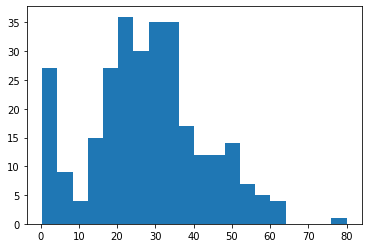

In [77]:
plt.hist(train_data['Age'][train_data.Survived == 1], bins=20)